# Compare our values to Nirody et al. 2021
<br>
This notebook = step kinematics <br>
  ... in Nirody this is:<br>

### Figure 1
### Table S2
### Figure S2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import gaitFunctions
import plotClip
import seaborn as sns

In [2]:
# navigate to directory that contains the data
os.chdir('/Users/iwoods/OneDrive - Ithaca College/movement_disorder_paper_2023/videos_exemplaris/analyses_summaries/')
for f in sorted(glob.glob('*.xlsx')):
    print(f)

all_exemplaris_through_9Nov23_combined.xlsx
iw_9Nov23_exemplaris_inverted_combined.xlsx


In [3]:
# specify the data file
data_file = 'iw_9Nov23_exemplaris_inverted_combined.xlsx'

# Nirody Figure 1

In [4]:
'''
Nirody figure 1A, 1B ... tardigrade size
they report body length 350.40 ± 46.04 (standard deviation)
n = 43 tardigrades

the tardigrade they show in 1B looks like a young one, with no eggs . . . 
but ours are smaller? See confirmation of size measurements a few cells down.
''' 

# load the path summaries data into a dataframe
path_df = pd.read_excel(data_file, sheet_name='path_summaries', index_col=None)
num_tardigrades = len(path_df.individual.values)
body_lengths = path_df['Body Length (mm)'].values * 1000
body_length = np.round(np.mean(body_lengths),2)
body_length_sd = np.round(np.std(body_lengths),2)

print('n = ' + str(num_tardigrades) + ' tardigrades')
print('body length = ' + str(body_length) + ' ± ' + str(body_length_sd) + ' µm')


n = 14 tardigrades
body length = 226.24 ± 34.05 µm


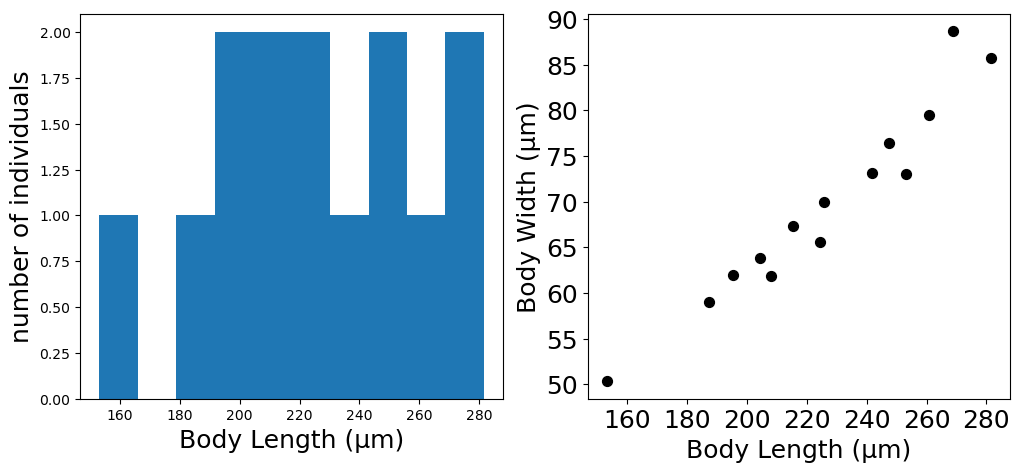

In [5]:
# more about size ... 
f,(a1,a2) = plt.subplots(1,2,figsize=(12,5))
a1.hist(body_lengths)
a1.set_ylabel('number of individuals',fontsize=18)
a1.set_xlabel('Body Length (µm)', fontsize=18)
body_widths = path_df['Body Width (mm)'].values * 1000
a2.scatter(body_lengths,body_widths,s=50,c='k')
a2.set_ylabel('Body Width (µm)',fontsize=18)
a2.set_xlabel('Body Length (µm)',fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

# Looking at size differences
Sizes are different between Nirody paper and our analyses ... <br>

Summary of analysis below - if our pix-per-mm 'scales' are correct (and they seem to be), our sizes are correct.

Re-check our size measurements: <br>

On images from the Amscope inverted scope with MD310B camera, capturing images at 1024x768.<br>
Measuring micrometer via Python = <br>
* about 957 pixels (956 on 8 Dec, 948 on 12 Dec, 957 on 14 Dec, 958 on 30 Jan, 955 on 1 Feb)<br>
* Confirmed these values on Preview app, Confirmed on FIJI<br><br>

Selected three tardigrades from 9Nov23 (AmScope) <br>
to measure pixels in FIJI and compare to PYTHON-calculated values:<br>
* iw_9Nov_tardigrade01_exemplaris_033-060_first  145 pix = 151.67 µm (FIJI) vs. 155.98 µm (path_stats)
* iw_9Nov_tardigrade02_exemplaris_080-087_first  230 pix = 240.58 µm (FIJI) vs. 253.72 µm (path_stats)
* iw_9Nov_tardigrade04_exemplaris_097-117_first  261 pix = 273.01 µm (FIJI) vs. 280.70 µm (path_stats)
<br>

On images from the Te-Wen inverted scope with Te-Wen camera, capturing images at 1920x1080.<br>
Measuring micrometer via Python = <br>
* about 1633 pixels (1637 in adults_15Sep, 1631 in babies_15Sep, 1633 in adults_28Nov)
* Confirmed these values on Preview app, Confirmed on FIJI<br><br>

Selected three tardigrades from 28Nov23 (Te-Wen Scope and camera) <br> 
to measure pixels in FIJI and compare to PYTHON-calculated values:<br>
* ea_16jul_tardigrade37A-day4_050-068_first  229.12 pix = 140.30 µm (FIJI) vs. 144.04 µm (path_stats)
* ea_28nov_exemplaris_tardigrade15_027-035_first  497.29 pix = 304.52 µm (FIJI) vs. 289.14 µm (path_stats)
* gi_15sep_tardigrade8_041-070_first  341.71 pix = 209.25 µm (FIJI) vs. 201.17 µm (path_stats)

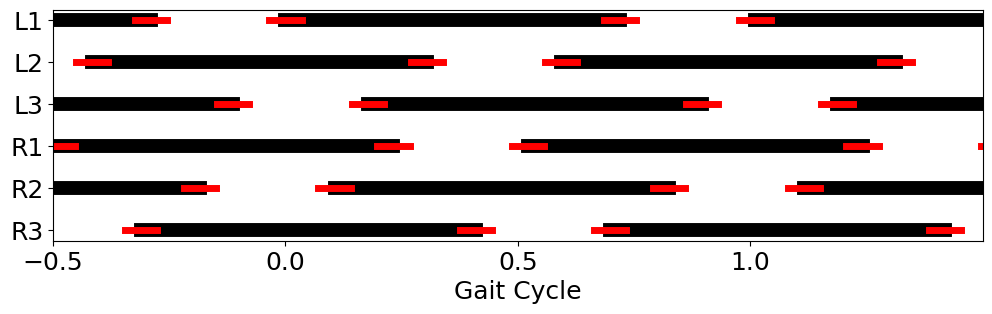

In [6]:
'''
Nirody figure 1C ... podogram
red bars show std of stance duration and swing duration

The code below will make a podogram from the step_summaries sheet,
which contains average data for all lateral legs (and for rear legs).
''' 
plot_order = ['R3','R2','R1','L3','L2','L1']

# load the step_summaries data into a dataframe
step_summaries_df = pd.read_excel(data_file, sheet_name='step_summaries', index_col=None)
stances = step_summaries_df['Stance duration (lateral legs)'].values / step_summaries_df['Gait cycle (lateral legs)'].values
swings = step_summaries_df['Swing duration (lateral legs)'].values / step_summaries_df['Gait cycle (lateral legs)'].values
gait_cycles = step_summaries_df['Gait cycle (lateral legs)'].values
ipsilateral_offset_mean = np.mean(step_summaries_df['Anterior swing offsets (normalized, lateral legs)'].values)
contralateral_offset_mean = np.mean(step_summaries_df['Opposite swing offsets (normalized, lateral legs)'].values)

stances_mean = np.mean(stances)
stances_std = np.std(stances)
swings_mean = np.mean(swings)
swings_std = np.std(swings)
gait_cycle_mean = np.mean(gait_cycles)

# get leg offsets for plot
leg_offsets = {}
for i, leg in enumerate(['R3','R2','R1']):
    leg_offsets[leg] = i * ipsilateral_offset_mean
for leg in ['R3','R2','R1']:
    contralateral_leg = 'L' + leg[1:]
    leg_offsets[contralateral_leg] = leg_offsets[leg] + contralateral_offset_mean
start_leg = 'L1'
plot_leg_offsets = {}
for k,v in leg_offsets.items():
    plot_leg_offsets[k] = leg_offsets[k] - leg_offsets[start_leg]

# set up plot
f,a = plt.subplots(1, figsize = (12,3))

# it looks like Nirody is plotting data for each leg separately (e.g. the error bars are different)
# should we do that? Or get data for each leg and plot independently?
# if we get data for each leg, how to deal with variation in step number between individual animals?
for i,leg in enumerate(plot_order):
    first_start = plot_leg_offsets[leg]
    for j in [-1,0,1,2]:
        start_stance = first_start + (j * gait_cycle_mean)
        end_stance = start_stance + stances_mean
        # plot stances
        plt.plot([start_stance,end_stance],[i,i],'k',linewidth=10)
        # plot stance errors
        plt.plot([end_stance-stances_std,end_stance+stances_std],[i,i],'r',linewidth=5)
        # plot swing_errors
        plt.plot([start_stance-swings_std,start_stance+swings_std],[i,i],'r',linewidth=5)

xlims = [-0.5,1.5]     
a.set_xlim(xlims)  
a.set_xlabel('Gait Cycle',fontsize=18)
a.set_xticks(np.arange(xlims[0],xlims[1],0.5))
a.set_yticks(np.arange(0,len(plot_order)))
a.set_yticklabels(plot_order)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

ipsilateral offset mean:   0.44
contralateral offset mean: 0.5


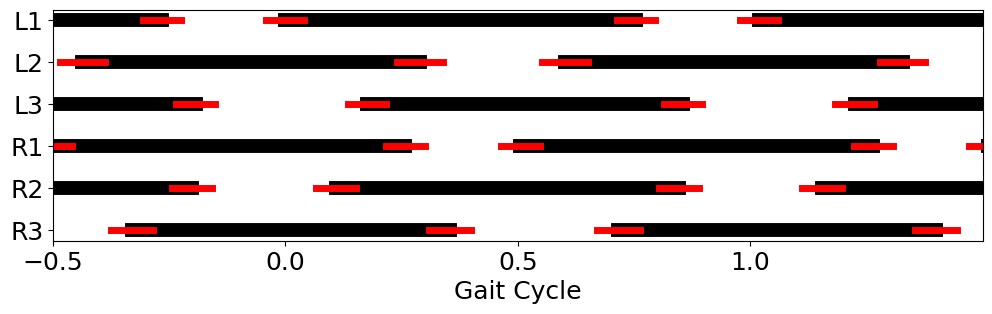

In [7]:
'''
Nirody figure 1C ... podogram 
red bars show std of stance duration and swing duration

The code below will make a podogram from the step_timing sheet,
which contains data for each step for each leg for each individual

We will calculate average stance, swing, gait cycle values for each leg 
of each individual animal, and then plot averages of these
''' 
plot_order = ['R3','R2','R1','L3','L2','L1']

# load the step_timing data into a dataframe
step_df = pd.read_excel(data_file, sheet_name='step_timing', index_col=None)
# print(step_df.head(3)) # testing

# for each individual, for each leg, get:
# number of steps, stance durations, swing durations, 
# store in dictionary: step_data[leg][parameter] = [mean values for each individual]
step_data = {}
individuals = sorted(np.unique(step_df['uniq_id'].values))
parameters = ['stance','swing','gait','duty','anterior_offsets','contralateral_offsets']

# set up empty dictionary
for leg in plot_order:
    step_data[leg] = {}
    step_data[leg]['number_of_steps'] = []
    for parameter in parameters:
        step_data[leg][parameter] = []
total_steps = {}  # key = individual ID, val = total steps in analysis
total_steps_overall = 0
        
# get the data for each individual and each leg, and add average value to dictionary
for individual in individuals:
    
    total_steps[individual] = 0
    
    # get slice of data for this individual
    individual_df = step_df[step_df['uniq_id'] == individual]
    for leg in plot_order:
        # get slice of data for this leg
        leg_df = individual_df[individual_df['legID']==leg]
        for parameter in parameters:

            # get data for this parameter for this leg for this individual
            parameter_data = leg_df[parameter].values

            # get mean value of this data ... 
            # need some care - some data contains nan
            # and some paramaters will have no data!
            if len(parameter_data) > 0 and np.any(~np.isnan(parameter_data)):
                mean_parameter_data = np.nanmean(parameter_data)
            else:
                mean_parameter_data = np.nan
            
            # append this mean value to the dictionary
            step_data[leg][parameter].append(mean_parameter_data)
            
            # keep track of number of steps per individual and per leg
            if parameter == 'stance':
                # count number of steps
                number_of_steps = len(parameter_data)
                step_data[leg]['number_of_steps'].append(number_of_steps)
                total_steps[individual] += number_of_steps
                total_steps_overall += number_of_steps

# To find inter-leg timing, we will need overall value for
# anterior offsets and contralateral offsets
all_anterior_offsets = []
all_contralateral_offsets = []
for individual in individuals:
    for leg in plot_order:
        all_anterior_offsets.extend(step_data[leg]['anterior_offsets'])
        all_contralateral_offsets.extend(step_data[leg]['contralateral_offsets'])
ipsilateral_offset_mean = np.nanmean(all_anterior_offsets)
contralateral_offset_mean = np.nanmean(all_contralateral_offsets)
print('ipsilateral offset mean:  ', np.round(ipsilateral_offset_mean,2))
print('contralateral offset mean:', np.round(contralateral_offset_mean,2))

# get leg offsets for plot
leg_offsets = {}
for i, leg in enumerate(['R3','R2','R1']):
    leg_offsets[leg] = i * ipsilateral_offset_mean
for leg in ['R3','R2','R1']:
    contralateral_leg = 'L' + leg[1:]
    leg_offsets[contralateral_leg] = leg_offsets[leg] + contralateral_offset_mean
start_leg = 'L1'
plot_leg_offsets = {}
for k,v in leg_offsets.items():
    plot_leg_offsets[k] = leg_offsets[k] - leg_offsets[start_leg]

# set up plot
f,a = plt.subplots(1, figsize = (12,3))

# ready to plot ... 
for i,leg in enumerate(plot_order):
    first_start = plot_leg_offsets[leg]
    gait_cycle_mean = np.nanmean(step_data[leg]['gait'])
    stances = np.array(step_data[leg]['stance']) / np.array(step_data[leg]['gait'])
    stances_mean = np.nanmean(stances)
    stances_std = np.nanstd(stances)
    swings = np.array(step_data[leg]['swing']) / np.array(step_data[leg]['gait'])
    swings_std = np.nanstd(swings)
    
    for j in [-1,0,1,2]:
        start_stance = first_start + (j * gait_cycle_mean)
        end_stance = start_stance + stances_mean
        # plot stances
        plt.plot([start_stance,end_stance],[i,i],'k',linewidth=10)
        # plot stance errors
        plt.plot([end_stance-stances_std,end_stance+stances_std],[i,i],'r',linewidth=5)
        # plot swing_errors
        plt.plot([start_stance-swings_std,start_stance+swings_std],[i,i],'r',linewidth=5)

xlims = [-0.5,1.5]     
a.set_xlim(xlims)  
a.set_xlabel('Gait Cycle',fontsize=18)
a.set_xticks(np.arange(xlims[0],xlims[1],0.5))
a.set_yticks(np.arange(0,len(plot_order)))
a.set_yticklabels(plot_order)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

Number of individuals analyzed:   14
Total number of cycles analyzed:  833


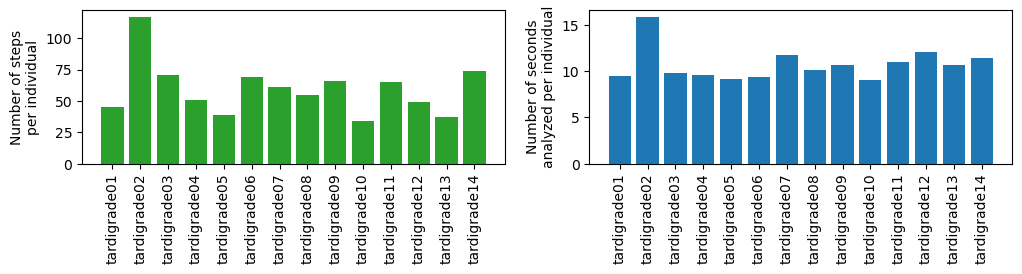

In [8]:
# report number of steps analyzed per individual
print('Number of individuals analyzed:  ', len(individuals))
print('Total number of cycles analyzed: ', total_steps_overall)
f,(a1,a2) = plt.subplots(1,2,figsize=(12,2))
for i, individual in enumerate(individuals):
    a1.bar(i, total_steps[individual], color = 'tab:green')
a1.set_ylabel('Number of steps\nper individual')
a1.set_xticks(np.arange(0,len(individuals)))
a1.set_xticklabels([x.split('_')[2] for x in individuals], rotation=90)

# report total time collecting step data per individual
# load data from gait_styles sheet
fps = 33
gait_df = pd.read_excel(data_file, sheet_name='gait_summaries', index_col=None)
gait_df.head(3)
individuals = gait_df.Identifier.values
secs_analyzed = gait_df['Number of frames'].values / fps
for i, individual in enumerate(individuals):
    a2.bar(i, secs_analyzed[i], color = 'tab:blue')
a2.set_ylabel('Number of seconds\nanalyzed per individual')
a2.set_xticks(np.arange(0,len(individuals)))
a2.set_xticklabels([x.split('_')[2] for x in individuals], rotation=90)

plt.show()

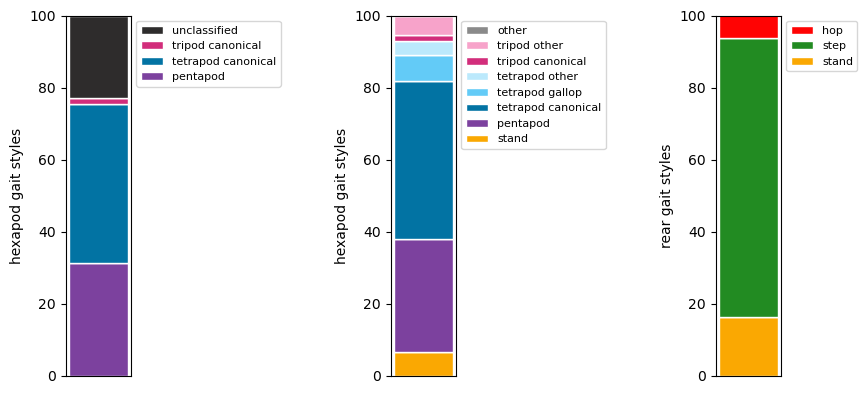

Values to match Nirody paper ... tripod: 1.7%; tetrapod: 44.1%; pentapod: 31.3%; unclassified: 22.9%


Nirody paper vals =               tripod: 3%,  tetrapod: 31%,   pentapod: 10%


In [9]:
''' 
Nirody figure 1D ... 
Percentages in canonical hexapod gait categories
They only report pentapod, canonical tripod, canonical tetrapod, and 'unclassified'

We can reproduce this ...
And we can also get a bit more granular
For example, for tetrapod we can report: tetrapod canonical, tetrapod gallop, tetrapod other
... and for tripod we can report: tripod canonical, tripod other

So, we will report these numbers (Nirody version and our more granular version)
Also, make plots (Nirody plot with their colors, our plot with our colors)

Can also report what the rear legs are doingd

'''

hexapod_combos, hexapod_color_dict = gaitFunctions.get_gait_combo_colors('hexapod')
bipod_combos, bipod_color_dict = gaitFunctions.get_gait_combo_colors('bipod')

# load gait data from gait_styles sheet
gait_df = pd.read_excel(data_file, sheet_name='gait_summaries', index_col=None)

# Nirody reported values for hexapod gait (and hex colors)
pentapod = np.mean(gait_df['% pentapod (lateral legs)'].values) # color = #d22d7b
tetrapod_canonical = np.mean(gait_df['% tetrapod canonical (lateral legs)'].values) #009bdd
tripod_canonical = np.mean(gait_df['% tripod canonical (lateral legs)'].values) #5d257e
unclassified = 100 - (pentapod + tetrapod_canonical + tripod_canonical) #181818

# Rest of the values for hexapod gait (and Nirody-adjacent colors)
stand = np.mean(gait_df['% stand (lateral legs)'].values) #bf1717
tetrapod_gallop = np.mean(gait_df['% tetrapod gallop (lateral legs)'].values) #a4ddf5
tetrapod_other = np.mean(gait_df['% tetrapod other (lateral legs)'].values) #caecfa
tripod_other = np.mean(gait_df['% tripod other (lateral legs)'].values) #c292de
other = np.mean(gait_df['% other (lateral legs)'].values) #8a8a8a

# Values for rear legs
rear_stand = np.mean(gait_df['% stand (rear legs)'].values)
rear_step = np.mean(gait_df['% step (rear legs)'].values)
rear_hop = np.mean(gait_df['% hop (rear legs)'].values)

# set up figure
f = plt.figure(figsize=(13,4))
hexapod_ylab = 'hexapod gait styles'

# Nirody hexapod categories
ax1 = f.add_axes([0.05,0.05,0.05,0.9])
groups = [['exemplaris 9Nov']]
categories = ['pentapod','tetrapod canonical','tripod canonical','unclassified']
proportions = [[pentapod, tetrapod_canonical, tripod_canonical, unclassified]]
plot_colors = [hexapod_color_dict[x] for x in categories]
ax1 = gaitFunctions.percentagesPlotWithLegend(ax1, groups, categories, proportions, plot_colors, hexapod_ylab)

# All hexapod categories
ax2 = f.add_axes([0.3,0.05,0.05,0.9])
categories = ['stand','pentapod','tetrapod canonical','tetrapod gallop','tetrapod other',
              'tripod canonical','tripod other','other']
proportions = [[stand, pentapod, tetrapod_canonical, tetrapod_gallop, tetrapod_other,
                tripod_canonical, tripod_other, other]]
plot_colors = [hexapod_color_dict[x] for x in categories]
ax2 = gaitFunctions.percentagesPlotWithLegend(ax2, groups, categories, proportions, plot_colors, hexapod_ylab)

# Rear categories
ax3 = f.add_axes([0.55,0.05,0.05,0.9]) 
categories = ['stand','step','hop']
proportions = [[rear_stand, rear_step, rear_hop]]
rear_plot_colors = [bipod_color_dict[x] for x in categories]
ax3 = gaitFunctions.percentagesPlotWithLegend(ax3, groups, categories, proportions, rear_plot_colors, 'rear gait styles')

plt.show()

summary = 'Values to match Nirody paper ... '
summary += ('tripod: ' + str(np.round(tripod_canonical,1)) + '%; ')
summary += ('tetrapod: ' + str(np.round(tetrapod_canonical,1)) + '%; ')
summary += ('pentapod: ' + str(np.round(pentapod,1)) + '%; ')
summary += ('unclassified: ' + str(np.round(unclassified,1)) + '%')

print(summary)
print('\n')
print('Nirody paper vals =               tripod: 3%,  tetrapod: 31%,   pentapod: 10%')

# Nirody supplemental data table S2

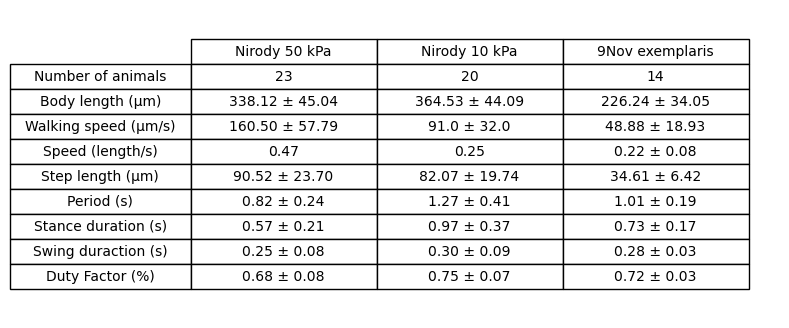

In [10]:
''' WORKING should also report CRUISING SPEED for ours

NIRODY Table S2 Values:
'Number of animals': [23,20],
'Body length (μm)':['338.12 ± 45.04','364.53 ± 44.09'],
'Walking speed (μm/s)':['160.50 ± 57.79','91.0 ± 32.0'],
'Step length (μm)': ['90.52 ± 23.70','82.07 ± 19.74'],
'Period (s)': ['0.82 ± 0.24','1.27 ± 0.41'],
'Stance duration (s)': ['0.57 ± 0.21','0.97 ± 0.37'],
'Swing duration (s)': ['0.25 ± 0.08','0.30 ± 0.09'],
'Duty Factor (%)': ['0.68 ± 0.08','0.75 ± 0.07']
'''

def meanstdstr(vals):
    return str(np.round(np.mean(vals),2)) + ' ± ' + str(np.round(np.std(vals),2))

row_names = ['Number of animals',
             'Body length (μm)',
             'Walking speed (μm/s)',
             'Speed (length/s)',
             'Step length (μm)',
             'Period (s)',
             'Stance duration (s)',
             'Swing duraction (s)',
             'Duty Factor (%)',
            ]

nirody_50pa = ['23','338.12 ± 45.04','160.50 ± 57.79',str(np.round(160.5/338.12,2)),'90.52 ± 23.70',
              '0.82 ± 0.24','0.57 ± 0.21','0.25 ± 0.08','0.68 ± 0.08']

nirody_10pa = ['20','364.53 ± 44.09','91.0 ± 32.0',str(np.round(91/364.53,2)),'82.07 ± 19.74',
              '1.27 ± 0.41','0.97 ± 0.37','0.30 ± 0.09','0.75 ± 0.07']

colname = '9Nov exemplaris'

# load the path summaries data into a dataframe (this has size and speed data)
path_df = pd.read_excel(data_file, sheet_name='path_summaries', index_col=None)

number_animals = str(len(path_df.individual.values))
body_length = meanstdstr(path_df['Body Length (mm)'].values * 1000)
speed_scaled = meanstdstr(path_df['Speed (mm/s)'].values * 1000)
speed_normalized = meanstdstr(path_df['Speed (body lengths / s)'].values)

# load the step_summaries data into a dataframe (this has step kinematics data)
step_summaries_df = pd.read_excel(data_file, sheet_name='step_summaries', index_col=None)
step_length = meanstdstr(step_summaries_df['mm per step (lateral legs)'].values * 1000)
period = meanstdstr(step_summaries_df['Gait cycle (lateral legs)'].values)
stance_duration = meanstdstr(step_summaries_df['Stance duration (lateral legs)'].values)
swing_duration = meanstdstr(step_summaries_df['Swing duration (lateral legs)'].values)
duty_factor = meanstdstr(step_summaries_df['Duty factor (lateral legs)'].values)

col_data = [number_animals, body_length, speed_scaled, speed_normalized, step_length,
           period, stance_duration, swing_duration, duty_factor]

table_vals = np.column_stack([nirody_50pa,nirody_10pa,col_data])
col_labels = ['Nirody 50 kPa','Nirody 10 kPa', colname]
row_labels = row_names
row_colors = ['white'] * len(row_labels)
col_colors = ['white'] * len(col_labels)

plt.figure(figsize=(8,4))
ax = plt.gca()

my_table = plt.table(cellText=table_vals,
                     colWidths=[0.3] * len(col_labels),
                     rowLabels=row_labels,
                     rowLoc='center', # left, center, right
                     cellLoc='center',
                     colLoc='center',
                     colLabels=col_labels,
#                      cellColours=cell_colors,
                     rowColours=row_colors,
                     colColours=col_colors,
#                      edges='horizontal',
                     loc='center')
my_table.scale(1, 1.5) # increase vertical space
ax.set_axis_off()
plt.show()

# Nirody Figure S2

The labels are messed up on this figure ... they use the S1 panel labels, and it is not clear what units they are using for the y-axes.<br>

Within-animal standard deviation of kinematic parameters (by leg)<br>
They do step amplitude, period, swing, stance (but not duty factor) 

If I am understanding the figure correctly ... they are taking SD from each animal, and making a histogram of those values across multiple animals?

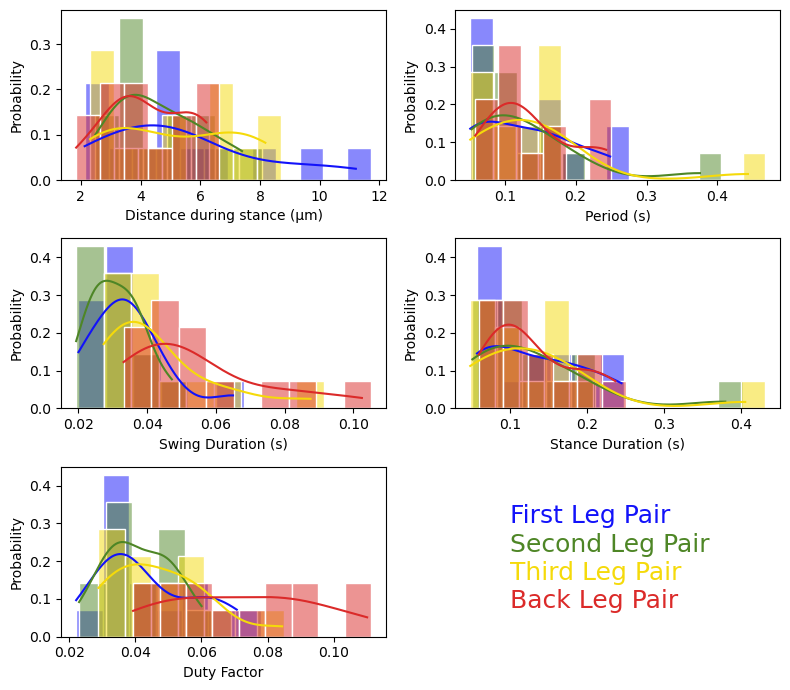

In [11]:
# load gait data from step_timing sheet
step_df = pd.read_excel(data_file, sheet_name='step_timing', index_col=None)
parameters = ['distance_during_step_scaled','gait','swing','stance','duty']
parameter_labels = ['Distance during stance (µm)','Period (s)','Swing Duration (s)',
                    'Stance Duration (s)','Duty Factor']
binwidths = np.array([1, 0.04, 0.01, 0.04, 0.01])
binwidths *= 0.8

# using leg parameter colors from Figure S1 (Nirody uses different colors)
leg_pairs = [['L1','R1'],['L2','R2'],['L3','R3'],['L4','R4']]
leg_pair_labels = ['First Leg Pair','Second Leg Pair','Third Leg Pair','Back Leg Pair']
leg_pair_colors = ['#1212fa','#4e8626','#f5da0a','#db2a29']

# get unique individuals
individuals = np.sort(np.unique(step_df.uniq_id.values))

# set up figure
f,axes = plt.subplots(3,2,figsize=(8,7))
axes_list = axes.reshape(1,6)[0]

# for each parameter
for i, parameter in enumerate(parameters):
    
    ax = axes_list[i]
    
    # for each leg pair
    for j,leg_pair in enumerate(leg_pairs):

        leg_pair_data = step_df[step_df['legID'].isin(leg_pair)]
        
        # make empty list for std
        std_vals = []

        # for each individual
        for individual in individuals:
            
            individual_data = leg_pair_data[leg_pair_data['uniq_id']==individual][parameter].values
            
            if parameter == 'distance_during_step_scaled':
                individual_data = individual_data * 1000 # convert mm to µm
        
            # calculate std for parameter, and add to empty list
            std_for_parameter = np.nanstd(individual_data)
            std_vals.append(std_for_parameter)

        # done collecting data for parameter and leg pair ... convert list to numpy array and add to plot
        std_vals = np.array(std_vals)
        
        ax = sns.histplot(std_vals, ax=ax, binwidth=binwidths[i], kde=True, stat='probability',
                 color=leg_pair_colors[j],edgecolor='w',visible=True) # can set to false to hide bars
        
        ax.set_xlabel(parameter_labels[i])
        
# last axes = labels
axes_list[5].set_axis_off()
textpos_x = 0.5
textpos_maxy = 0.8 
textpos_yincrement = 0.05
for i,leg_pair in enumerate(leg_pairs):
    axes_list[5].text(textpos_x, textpos_maxy-(i*textpos_yincrement),
                     leg_pair_labels[i], color=leg_pair_colors[i],fontsize=18)

axes_list[5].set_xlim([0.4,1])
axes_list[5].set_ylim([0.6,0.9])
plt.tight_layout()

plt.show()